# User prediction

Let's see how a user can run `maxsmi` for compound prediction.

In [1]:
from pathlib import Path
import ast
import os
import pandas as pd
from IPython.display import Image

In [2]:
# Path to this notebook
HERE = Path(_dh[-1])

In [3]:
%%bash
cd ../..
python maxsmi/prediction_unlabeled_data.py --help

usage: prediction_unlabeled_data.py [-h] [--task TASK]
                                    [--smiles_prediction USER_SMILES]

optional arguments:
  -h, --help            show this help message and exit
  --task TASK           data to be used
  --smiles_prediction USER_SMILES
                        SMILES for prediction


Let's predict lipophilicity for the semaxanib drug given by the SMILES `O=C2C(\c1ccccc1N2)=C/c3c(cc([nH]3)C)C`:

In [4]:
%%bash
cd ../..
python maxsmi/prediction_unlabeled_data.py --task=lipophilicity --smiles_prediction="O=C2C(\c1ccccc1N2)=C/c3c(cc([nH]3)C)C"

Script completed. Output can be found at maxsmi/user_prediction/lipophilicity_O=C2C(%5Cc1ccccc1N2)=C%2Fc3c(cc([nH]3)C)C/


_Note_: the backslash has a special significance in both the python programming language and SMILES notation, and therefore should be treated with care.

In [5]:
from maxsmi.utils_smiles import smiles_to_folder_name
smiles_to_folder_name?

Signature: smiles_to_folder_name(smiles)
Docstring:
Encodes the SMILES containing special characters as URL encoding.

Parameters
----------
smiles : str
    SMILES string describing a compound.

Returns
-------
str :
    The standard URL encoding of the SMILES if it contains special characters.

Notes
-----
: -> %3A
\ -> %5C (here backslash)
/ -> %2F
* -> %2A

Taken from:
https://www.degraeve.com/reference/urlencoding.php
File:      ~/Documents/github/maxsmi/maxsmi/utils_smiles.py
Type:      function


In [6]:
path = (f"{HERE}/../../maxsmi/user_prediction/"
        f"lipophilicity_O=C2C(%5Cc1ccccc1N2)=C%2Fc3c(cc([nH]3)C)C")

Let's see what was stored during the execution.

In [7]:
list_output_files = os.listdir(path)
list_output_files

['user_prediction_table.csv', '2D_molecule.png', 'user_prediction_output.log']

There are three files:

* `user_prediction_table.csv`: The results of the prediction in a csv table,
* `2D_molecule.png`: A PNG figure representing the molecular graph,
* `user_prediction_output.log`: Additional information on the prediction in a log file.

Let's have a closer look at each of them.

The log file contains detailed information on the model used, augmentation strategy as well as the results.

In [8]:
log_file = [string for string in list_output_files
            if string.endswith("log")][0]

with open(f"{path}/{log_file}") as f:
    for _ in range(15):  # show first 15 lines
        line = next(f).strip()
        print(line)

INFO:root:Start at 2021-09-22 11:14:25.854687
INFO:root:Data and task: lipophilicity
INFO:root:CUDA available: False
INFO:root:Shape of training data set before processing: (4200, 2)
INFO:root:Shape of training data set after processing: (4199, 3)
INFO:root:SMILES in training data set: False
INFO:root:Augmentation strategy: augmentation_with_duplication
INFO:root:Augmentation number: 80
INFO:root:Time for augmentation 0:00:00.006277
INFO:root:Longest smiles in training data set: 268
INFO:root:Summary of ml model used for the prediction: Convolutional1DNetwork(
(convolution): Conv1d(48, 300, kernel_size=(10,), stride=(1,))
(fully_connected_1): Linear(in_features=77700, out_features=100, bias=True)
(fully_connected_out): Linear(in_features=100, out_features=1, bias=True)
)


Let's plot the molecular graph of the semaxanib drug.

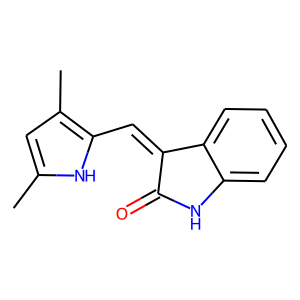

In [9]:
image_file = [string for string in list_output_files
              if string.endswith("png")][0]
Image(filename=f"{path}/{image_file}")

Let's have a closer look at the prediction.

In [10]:
results_csv_file = [string for string in list_output_files
                    if string.endswith("csv")][0]
results = pd.read_csv(f"{path}/{results_csv_file}")
results

,user_smiles,smiles_in_training,canonical_smiles,augmented_smiles,per_smiles_prediction,average_prediction,std_prediction
0,O=C2C(\c1ccccc1N2)=C/c3c(cc([nH]3)C)C,False,Cc1cc(C)c(/C=C2\C(=O)Nc3ccccc32)[nH]1,"['C(=C1\\C(=O)Nc2ccccc21)\\c1[nH]c(C)cc1C', 'c...","[3.3088372, 2.6702151, 2.3722568, 2.8875313, 2...",3.042491,0.376354


In [11]:
print(f"SMILES given by the user: \t{results.user_smiles[0]}\n"
      f"Part of the training set: \t{results.smiles_in_training[0]}\n"
      f"Its lipophilicity value is predicted to be: \t"
      f"{results.average_prediction[0]:.3f} "
      f"with a confidence of {results.std_prediction[0]:.3f}.")

SMILES given by the user: 	O=C2C(\c1ccccc1N2)=C/c3c(cc([nH]3)C)C
Part of the training set: 	False
Its lipophilicity value is predicted to be: 	3.042 with a confidence of 0.376.


The first $n=7$ random SMILES are given by:

In [12]:
random_smiles = ast.literal_eval(results.augmented_smiles[0])[0:7]
random_smiles

['C(=C1\\C(=O)Nc2ccccc21)\\c1[nH]c(C)cc1C',
 'c1c2c(ccc1)/C(C(=O)N2)=C/c1c(C)cc(C)[nH]1',
 'C1(=O)Nc2c(cccc2)/C1=C/c1c(cc(C)[nH]1)C',
 '[nH]1c(/C=C2\\C(Nc3c2cccc3)=O)c(C)cc1C',
 'C(=C1/c2c(cccc2)NC1=O)\\c1c(cc(C)[nH]1)C',
 'Cc1cc(C)[nH]c1/C=C1\\C(=O)Nc2c1cccc2',
 'Cc1cc(C)[nH]c1/C=C1\\C(=O)Nc2c1cccc2']

The predictions associated to these random SMILES are:

In [13]:
per_smiles_prediction = ast.literal_eval(results.per_smiles_prediction[0])[0:7]
for prediction in per_smiles_prediction:
    print(f"{prediction:.3f}")

3.309
2.670
2.372
2.888
2.792
3.324
3.324


As expected, the two last SMILES, which are identical, have the same prediction.